# 1. 환경

## 1.1 Python 설치

### 1.1.1 윈도우

* https://www.python.org/download로 가서 Windows Installer 설치
* Python version 2 vs 3 -> 여기서는 Python2.7 사용
* 설치경로: "C:" 드라이브 맨 위 디렉토리에 설치 된다. 경로를 변경해서 설치해도 된다.

### 1.1.2 Linux/Mac

* 이미 설치되어 있슴.

## 1.2 pip 설치

* Python을 이용하여 작업을 하려면 라이브러리가 필요하다.
* pip는 Python package 관리자
* 윈도우에서 conmand 창을 열어, 설치된 경로 아래 `Scripts>`디렉토리에 가면 easy_install, pip가
설치되었는지 확인할 수 있다. 설치가 안되어 있는 경우, 설치를 손쉽게 할 수 있다.
* setuptools를 다운로드해서 아래와 같이 설치

```
set PYTHON_HOME=C:/Python2.7
set path=%path%;%PYTHON_HOME%
// setuptools를 다운로드하고, 디렉토리에 setup.py가 있는지 확인
C:/Python2.7/python setup.py install
cd Scripts
C:/Python2.7/Scripts/easy_install.exe pip
pip install
```

* pip를 설치하고 나면 라이브러리를 아래와 같이 손쉽게 설치.

```
$ pip search statsmodels
$ pip install statsmodels
```

* git 리포에서 직접 patsy 소스를 다운로드 받아서 설치하는 예이다.

```
~/Code/git/else$ git clone https://github.com/pydata/patsy.git
Cloning into 'patsy'...
remote: Counting objects: 2028, done.
remote: Total 2028 (delta 0), reused 0 (delta 0)
Receiving objects: 100% (2028/2028), 1.55 MiB | 757.00 KiB/s, done.
Resolving deltas: 100% (1306/1306), done.
Checking connectivity... done.
~/Code/git/else$ cd patsy/
~/Code/git/else/patsy$ ls
doc          MANIFEST.in  README.rst             setup.cfg  TODO   tox.ini
LICENSE.txt  patsy        release-checklist.txt  setup.py   tools
$ sudo python setup.py install
$ pip-2.7 freeze | grep patsy
```

## 1.3 python scientific library

* numpy
    * 윈도우에서 설치할 경우 c compiler 필요.
    * Visual Studio 2008를 기본으로 찾음. 없으면 MinGW Compiler 설치.
    * MinGW를 사용할 경우 Python27/Lib/distutils/distutils.cfg 편집

```
    [build]
    compiler = mingw32
    [build_ext]
    compiler = mingw32
```

* matplotlib
* statsmodel
* patsy: 오타주의!
* seaborn
* scikit-learn
* gensim
* pymc
    * linux and mac(after gfortran installed) ok 
        * pip install pymc==2.3
        * pip install git+https://github.com/pymc-devs/pymc
    * mac to install gfortran
        * download, drag to Applicaiton
        * which gfortran-mp-4.8 
        * sudo ln -s gfortran-mp-4.8 gfortran
    * errors - ld: symbol(s) not found for architecture x86_64
        * use gfortran (not g95)
        * port install g95 (pymc requires fortran compiler) (gfortan is not on macport)
        * add -stdlib=libstdc++ -lstdc++
        There are two implementations of the standard C++ library available on OS X:
        libstdc++ and libc++.  On 10.8 and earlier libstdc++ is chosen by default,
        on 10.9 libc++ is chosen by default.
    * freetype error
        * sudo apt-get install libfreetype6-dev libxft-dev
* sympy: note sympy to latex

## 1.4 site package

In [1]:
import site
site.getsitepackages()

['C:\\Anaconda2', 'C:\\Anaconda2\\lib\\site-packages']

# 2. intro

## 2.1 notations (Population, sample)

* 평균, 갯수, 표준편차, 상관계수는 각 각 다음과 같이 표시된다.

* population
    * mean $\mu$
    * N 
    * standard deviation $\sigma$
    * correlation coefficient $\rho$

* sample
    * sample mean $\bar{x}$
    * number of obs n
    * number of samples (each having n elements) K
    * standard deviation s
    * correlation coefficient r

* math latex in ipython notebook cells
    * $\vec{a}$

## 2.2 pylab

* pylab은 matplotlib.pyplot과 namespace 동일하게 이해.
* pylab은 numpy함수를 namespace없이 부르게 함 (sin,cos..)

## 2.3 statsmodels은 R 스타일의 모델링 제공 (y ~ ax..)

* import statsmodels.formula.api as sm (not statsmodels.api)
* statsmodels.api는 대문자 (예:OLS)
* statsmodels.formula.api는 df, 소문자 지원 (ols)
* '~'  Separate the left-hand side from the right-hand side.
* '+'  Combines terms on either side (set union).
* '-'  Removes terms on the right from set of terms on the left (set difference).
* '*'  a*b is shorthand for the expansion a + b + a:b.
* '/'  a/b is shorthand for the expansion a + a:b.
* ':'  Computes the interaction between terms on the left and right.
* '**' Takes a set of terms on the left and an integer n on the right and computes
the * of that set of terms with itself n times.

In [2]:
# ??mac에서는 scipy.stats statsmodels.forumula를 로딩하는 에러
import numpy as np
import matplotlib.pyplot as plt

from pylab import *

import pandas as pd

import scipy
import scipy.stats as stats
from scipy import stats

import statsmodels
import statsmodels.formula.api as sm

import sklearn as sk
import sympy as sym

## 2.4 learning Sympy

* 먼저 기호를 정의해야 한다.
* lambdify - 간편하게 Sympy표현식을 lambda로 변환

In [16]:
from sympy.abc import w,x,y,z
f=sym.lambdify(x,x*2)
print f(2)

row=sym.lambdify((x,y),sym.Matrix((x,x+y)).T,modules='sympy')
print row(1,2)

#Attention: There are naming differences between numpy and sympy.
#So if you simply take the numpy module, e.g. sympy.atan will not be translated to numpy.arctan.
#Use the modified module instead by passing the string "numpy":
import numpy as np
f=sym.lambdify((x,y),sym.tan(x*y),np)
f=sym.lambdify((x,y),sym.tan(x*y),"numpy")
print f.func_name

4
Matrix([[1, 3]])
<lambda>


## 2.5 Python

* 수학적 표현을 프로그램으로 표현할 수 있게 해 봄. 

### 2.5.1 출력과 도움말

In [3]:
# comments
print "Hello World!!!"

Hello World!!!


### 2.5.2 variables

* 변수는 메모리의 저장공간을 확보해서 활용하기 위해 그 곳에 이름을 붙여 놓는 것.
* 변수는 메모리의 공간이라서 수, 문자, 소수점 크기에 따라 차지하는 공간이 차이가 있슴.
* 변수는 언제 하는가? 재사용
* 효율적인 공간활용을 위해서는 최소한으로 확보
* 다른 컴파일 언어에서는 수를 사용하는 변수는 문자를 넣을 수가 없으나 스크립트언어에서는 문제가 되지 않는다.

In [2]:
a=3
b=2*a
print type(b)
print b
print a*b
# 6이 저장되어 있었지만 지금은 문자열을 넣음. 그래도 오류가 없슴.
b="hello"
print type(b)
# operator overloading
print b+b
print 2*b

<type 'int'>
6
18
<type 'str'>
hellohello
hellohello


### 2.5.3 데이터타잎

* boolean type
* 수
    * int
    * float
*  문자
* containers
    * list
    ```
    a=list()
    ```
    
    * tuples
    * set
    * dictionaries

In [3]:
# boolean
print 3>4
test=(3>4)
type(test)

# float
print 7*3.

# power
print 2**10
print 3/2
print 3/2.

# containers
l=[1,2,3,4,5]
print type(l)
print l[2]
print l[-1]
print  l[2:4]
print l[3:]
print l[:3]
print l[::2]

# lists are mutable
l[0]=28
print l

# list may have different types
l[0]='hello'
print l
l.append(10)
print l
print l.pop()

print l
l=l[2:5]
print l

# Dictionary of hash table
room={'jsl':405, 'lecture':415}
print room
print room.values()
print room.keys()
print room['jsl']

False
21.0
1024
1
1.5
<type 'list'>
3
5
[3, 4]
[4, 5]
[1, 2, 3]
[1, 3, 5]
[28, 2, 3, 4, 5]
['hello', 2, 3, 4, 5]
['hello', 2, 3, 4, 5, 10]
10
['hello', 2, 3, 4, 5]
[3, 4, 5]
{'jsl': 405, 'lecture': 415}
[405, 415]
['jsl', 'lecture']
405


### 2.5.4 control flow

In [2]:
if 2**2 == 4:
   print "yes"

a=3
if a==1:
   print 'a=1'
elif a==2:
   print 'a=2'
else:
   print 'a is neither 1 nor 2'

for i in range(5):
   print i
for word in ('warm','sunny','beautiful'):
   print('Today is %s' % word)
words=['warm','sunny','beautiful']
for index, item in enumerate(words):
   print index, item

# iterator
d={'a':1,'b':1.2,'c':2}
for key,val in d.iteritems():
   print('key:%s value:%s' % (key,val))

# sum of square
print sum(x*x for x in [1, 2, 3, 4, 5])

yes
a is neither 1 nor 2
0
1
2
3
4
Today is warm
Today is sunny
Today is beautiful
0 warm
1 sunny
2 beautiful
key:a value:1
key:c value:2
key:b value:1.2


### 2.5.5 function definition

In [2]:
def test():
   print 'This is a test function'
test()

# return
def getCircleArea(radius):
   return 3.14*radius*radius

print getCircleArea(1.5)

area=getCircleArea(1.5)
print area

# optional parameters
def double_it(x=2):
   return x*2
print double_it()
print double_it(2)
print double_it(3)

this is a test function
7.065
7.065
4
4
6


### 2.5.6 scripts


* save a Python program (.py) and run from the OS prompt ($ python test.py)

In [7]:
%pwd

u'C:\\Users\\DB400T2A'

In [9]:
%%writefile my.txt
hello

Overwriting my.txt


In [14]:
!dir my.txt

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 1CA9-D49E

 C:\Users\DB400T2A 디렉터리

2016-03-15  오후 02:20                 5 my.txt
               1개 파일                   5 바이트
               0개 디렉터리  77,292,552,192 바이트 남음


In [12]:
%%writefile test.py
import os
print os.getcwd()

# echo 'jsl' > hello.txt
f=open('my.txt','r')
s=f.read()
print s
f.close()

Writing test.py


In [15]:
!dir test.py

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 1CA9-D49E

 C:\Users\DB400T2A 디렉터리

2016-03-15  오후 02:22               110 test.py
               1개 파일                 110 바이트
               0개 디렉터리  77,292,548,096 바이트 남음


In [16]:
%run test.py

C:\Users\DB400T2A
hello


In [17]:
%%writefile test1.py
def test():
   print 'This is a test function'

Writing test1.py


In [19]:
!dir test1.py

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 1CA9-D49E

 C:\Users\DB400T2A 디렉터리

2016-03-15  오후 02:24                47 test1.py
               1개 파일                  47 바이트
               0개 디렉터리  77,293,604,864 바이트 남음


In [20]:
import test1
test1.test()

This is a test function


### IPython

* shell

In [4]:
!ls

README.md
src
st_intro.ipynb


In [5]:
%pwd

u'C:\\Users\\DB400T2A\\Documents\\jsl\\Code\\s'

In [6]:
%cd ~

C:\Users\DB400T2A


## 2.6 numpy

* numpy는 공학적 계산을 위한 array를 제공 (Python이 제공하는 데이터구조에 추가)
* numpy를 사용하면, 공학적 vector, matrix 연산을 할 수 있다.

### Array 생성

* 생성방법
    * 기본적인 방법
        ```
        a=np.array([0,1,2])
        ```
        
     * 다른 방법 - arange, zeros, ones, eye

* array는 1차원, 2차원, 다차원으로 생성할 수 있다.
* data type
    * bool
    * int - int8, int16, int32, int64, uint8, uint16, uint32, uint64
    * float - float16, float64
    * complex - complex64, complex128

In [29]:
import numpy as np
a=np.array([0,1,2])
print a
print a.dtype
print a.shape

[0 1 2]
int64
(3,)


In [30]:
b=np.array([3,4,5], float)
print b.dtype

float64


In [32]:
## range, aranage, linspace를 이용해 한꺼번에 생성
c=np.arange(10)
print c
d=np.arange(0.,10.,2)
print d
e=np.linspace(0,1,5)
print e

[0 1 2 3 4 5 6 7 8 9]
[ 0.  2.  4.  6.  8.]
[ 0.    0.25  0.5   0.75  1.  ]


In [34]:
# 기본 data type
f=np.ones((3,3))
print f
print f.dtype

# int로 생성
g=np.ones(5,dtype=np.int)
print g
print g.dtype

# zeros
h=np.zeros((3,2))
print h
print h.dtype

# eye
i=np.eye(5)
print i
print i.dtype

[[ 1.  1.  1.]
 [ 1.  1.  1.]
 [ 1.  1.  1.]]
float64
[1 1 1 1 1]
int64
[[ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]]
float64
[[ 1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  1.]]
float64


### Array 사용하기

* 읽기 - 인덱스 방식
    * 정수 인덱스
    * 범위 인덱스
* 쓰기 - mutable

In [35]:
print f

[[ 1.  1.  1.]
 [ 1.  1.  1.]
 [ 1.  1.  1.]]


In [36]:
print f[0][1]

1.0


In [37]:
f[0][0]=2
print f

[[ 2.  1.  1.]
 [ 1.  1.  1.]
 [ 1.  1.  1.]]


In [14]:
f[0]

array([ 2.,  1.,  1.])

### 복사

In [38]:
x = np.array([1, 2, 3], float)
y = x
z = x.copy()
x[0] = 0
print x
print y
print z


[ 0.  2.  3.]
[ 0.  2.  3.]
[ 1.  2.  3.]


### 전환

* axis    
    * 0은 열
    * 1은 행

In [39]:
x = np.array([[1, 2], [3, 4]], float)
y = np.array([[5, 6], [7, 8]], float)
print np.concatenate((x,y))
print np.concatenate((x,y), axis=0)
print np.concatenate((x,y), axis=1)

[[ 1.  2.]
 [ 3.  4.]
 [ 5.  6.]
 [ 7.  8.]]
[[ 1.  2.]
 [ 3.  4.]
 [ 5.  6.]
 [ 7.  8.]]
[[ 1.  2.  5.  6.]
 [ 3.  4.  7.  8.]]


### 형변환

In [21]:
z=np.concatenate((x,y), axis=1)
zlist=z.tolist()
print type(zlist)
print zlist

<type 'list'>
[[1.0, 2.0, 5.0, 6.0], [3.0, 4.0, 7.0, 8.0]]


### array 계산

In [40]:
a = np.array([1,2,3], float)
b = np.array([6,8,7], float)
print a + b
print a - b
print a * b
print b / a
print a % b
print b**a


[  7.  10.  10.]
[-5. -6. -4.]
[  6.  16.  21.]
[ 6.          4.          2.33333333]
[ 1.  2.  3.]
[   6.   64.  343.]


### array 함수

In [43]:
# 객체지향방식
v = np.array([1, 2, 3, 4, 5], float)
print v.sum()
print v.prod()

# np함수 이용(참조: java Collections)
print np.sum(v)
print np.prod(v)

print v.argmin()
print v.argmax()

w = np.array([[0, 2], [3, -1], [3, 5]], float)
print w
print w.mean(axis=0)
print w.mean(axis=1)
print w.min(axis=0)
print w.max(axis=1)


15.0
120.0
15.0
120.0
0
4
[[ 0.  2.]
 [ 3. -1.]
 [ 3.  5.]]
[ 2.  2.]
[ 1.  1.  4.]
[ 0. -1.]
[ 2.  3.  5.]


### 벡터와 매트릭스

In [44]:
a = np.array([1, 2, 3], float)
b = np.array([0, 1, 1], float)
print np.dot(a, b)

5.0


### random

* 무작위 수의 생성
* 분포에 따라 생성성


In [26]:
np.random.rand(10)

array([ 0.18651832,  0.4450442 ,  0.75485443,  0.0398038 ,  0.56329059,
        0.26729779,  0.63829651,  0.37140722,  0.70486008,  0.64616812])

In [27]:
np.random.randint(0,9)

5

In [28]:
# 평균 170 표준편차 10
np.random.normal(170,10)

176.35726734691576

## 2.7 visualization

* pylab을 사용하면
    * namespace를 사용하지 않아도 된다 (numpy, matplotlib)
        ```
        from pylab import *
        ```
        
    * 그래프를 브라우저 외부에 출력한다.
* matplotlib을 사용하면 (객체지향 방식)
    * namespace를 사용해야 한다.
        ```
        import matplotlib.pyplot as plt
        ```
     * 내부에 출력하려면 inline

In [45]:
from pylab import *

a=arange(20)
plot(a,a**2)
show()

In [23]:
import matplotlib.pyplot as plt
import numpy as np

a=np.arange(20)
plt.plot(a,a**2)
plt.show()


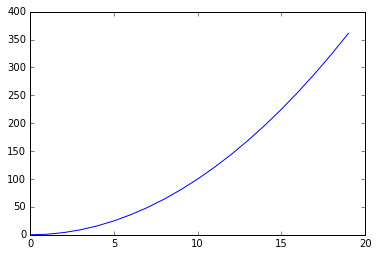

In [24]:
%matplotlib inline

import matplotlib.pyplot as plt

a=np.arange(20)
plt.plot(a,a**2)
plt.show()

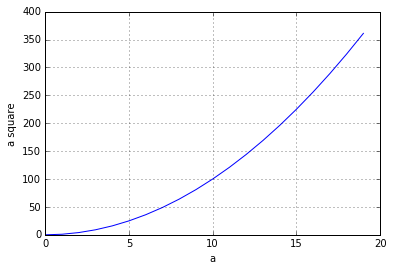

In [25]:
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(a,a**2)
ax.set_xlabel('a')
ax.set_ylabel('a square')
ax.grid()
plt.show()

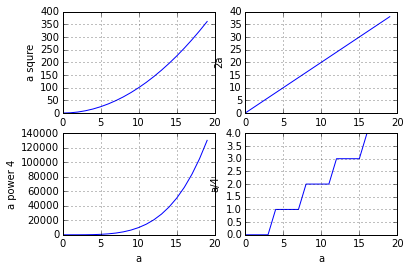

In [63]:
fig=plt.figure()
ax221=fig.add_subplot(221)
ax221.plot(a,a**2)
ax221.set_xlabel('a')
ax221.set_ylabel('a squre')
ax221.grid()

ax222=fig.add_subplot(222)
ax222.plot(a,a*2)
ax222.set_xlabel('a')
ax222.set_ylabel('2a')
ax222.grid()

ax223=fig.add_subplot(223)
ax223.plot(a,a**4)
ax223.set_xlabel('a')
ax223.set_ylabel('a power 4')
ax223.grid()

ax224=fig.add_subplot(224)
ax224.plot(a,a/4)
ax224.set_xlabel('a')
ax224.set_ylabel('a/4')
ax224.grid()

plt.show()

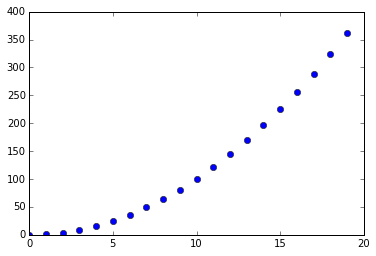

In [48]:
plt.plot(a,a**2,'o')
plt.show()

-3.14159265359


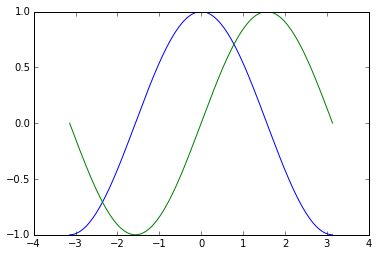

In [49]:
print -np.pi
x=np.linspace(-np.pi,np.pi,256,endpoint=True)
c,s=np.cos(x),np.sin(x)
plt.plot(x,c)
plt.plot(x,s)
plt.show()

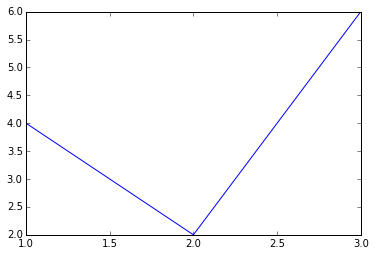

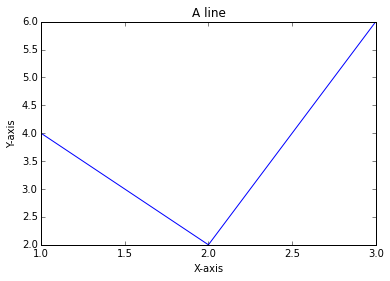

In [50]:
plt.plot([1,2,3],[4,2,6])
plt.show()
plt.plot([1,2,3],[4,2,6])
title("A line")
xlabel("X-axis")
ylabel("Y-axis")
plt.show()

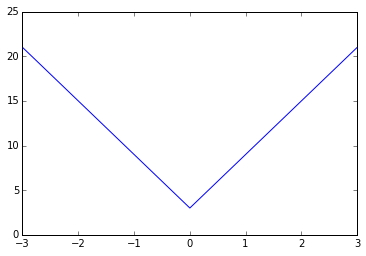

In [51]:
def f(x):
  return 2*x**2+3

plt.plot([-3,0,3],[f(-3),f(0),f(3)])
plt.show()

In [ ]:
xs1=np.arange(-3,3,0.1)
plt.plot(xs1,[f(x) for x in xs1])
plt.show()

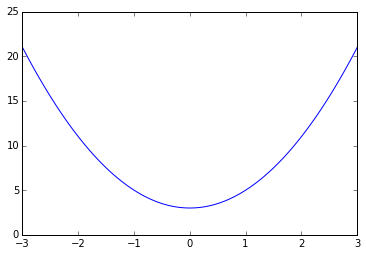

In [52]:
xs2=np.linspace(-3,3,100)
plt.plot(xs2,[f(x) for x in xs2])
plt.show()